In [1]:
import pandas as pd
import numpy as np
from scipy import stats

pd.set_option('display.max_columns', 380)
pd.set_option('display.width', 140)
pd.set_option('display.max_rows', 380)


#------ for model evaluation -----
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#----- for preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

#---- for model building
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#---- for cross validation
#from sklearn.cross_validation import train_test_split

#---- for visualization---
import matplotlib.pyplot as plt 
import seaborn as sn

#------ for model evaluation -----
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#---- For handling warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
## ------------------- Gather the data -----------------

### Here data is provided as .csv file with the problem.
### Let's import the data 
emp_abntsm=pd.read_excel('Absenteeism_at_work_Project.xls')
emp_abntsm.head()
##---------- --------------------------

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [3]:
# For ease of operations, lets change the names of the columns to short versions
#emp_abntsm.rename(columns=lambda x: x.replace(' ', '_'))
emp_abntsm=emp_abntsm.rename(columns = {'Reason for absence':'Absence_Reason','Month of absence':'Absence_Month','Day of the week':'Absence_Day','Transportation expense': 'Transportation_Expense','Distance from Residence to Work':'Work_Distance','Service time':'Service_Time','Work load Average/day ':'Average_Workload','Hit target': 'Hit_Target','Disciplinary failure':'Disciplinary_Failure','Social drinker':'Drinker','Social smoker':'Smoker','Body mass index':'BMI','Absenteeism time in hours':'Absent_Hours'})
emp_abntsm.head()


print (emp_abntsm.shape
)
print(emp_abntsm.info()
)

(740, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                        740 non-null int64
Absence_Reason            737 non-null float64
Absence_Month             739 non-null float64
Absence_Day               740 non-null int64
Seasons                   740 non-null int64
Transportation_Expense    733 non-null float64
Work_Distance             737 non-null float64
Service_Time              737 non-null float64
Age                       737 non-null float64
Average_Workload          730 non-null float64
Hit_Target                734 non-null float64
Disciplinary_Failure      734 non-null float64
Education                 730 non-null float64
Son                       734 non-null float64
Drinker                   737 non-null float64
Smoker                    736 non-null float64
Pet                       738 non-null float64
Weight                    739 non-null float64
Height                    726 non-null float6

In [4]:
emp_abntsm.nunique()

ID                        36
Absence_Reason            28
Absence_Month             13
Absence_Day                5
Seasons                    4
Transportation_Expense    24
Work_Distance             25
Service_Time              18
Age                       22
Average_Workload          38
Hit_Target                13
Disciplinary_Failure       2
Education                  4
Son                        5
Drinker                    2
Smoker                     2
Pet                        6
Weight                    26
Height                    14
BMI                       17
Absent_Hours              19
dtype: int64

In [5]:
emp_abntsm.isnull().sum()

ID                         0
Absence_Reason             3
Absence_Month              1
Absence_Day                0
Seasons                    0
Transportation_Expense     7
Work_Distance              3
Service_Time               3
Age                        3
Average_Workload          10
Hit_Target                 6
Disciplinary_Failure       6
Education                 10
Son                        6
Drinker                    3
Smoker                     4
Pet                        2
Weight                     1
Height                    14
BMI                       31
Absent_Hours              22
dtype: int64

In [6]:
null_cols = emp_abntsm.columns[emp_abntsm.isnull().any()]
emp_abntsm[null_cols].isnull().sum()

Absence_Reason             3
Absence_Month              1
Transportation_Expense     7
Work_Distance              3
Service_Time               3
Age                        3
Average_Workload          10
Hit_Target                 6
Disciplinary_Failure       6
Education                 10
Son                        6
Drinker                    3
Smoker                     4
Pet                        2
Weight                     1
Height                    14
BMI                       31
Absent_Hours              22
dtype: int64

In [7]:
emp_abntsm.set_index('ID').sort_index(ascending= True)
emp_abntsm.head(20)

,ID,Absence_Reason,Absence_Month,Absence_Day,Seasons,Transportation_Expense,Work_Distance,Service_Time,Age,Average_Workload,Hit_Target,Disciplinary_Failure,Education,Son,Drinker,Smoker,Pet,Weight,Height,BMI,Absent_Hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,97.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,97.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,97.0,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [8]:
print(emp_abntsm[emp_abntsm.isnull().any(axis =1)][null_cols])

     Absence_Reason  Absence_Month  Transportation_Expense  Work_Distance  Service_Time   Age  Average_Workload  Hit_Target  \
5              23.0            7.0                   179.0           51.0          18.0  38.0          239554.0        97.0   
6              22.0            7.0                     NaN           52.0           3.0  28.0          239554.0        97.0   
14             23.0            7.0                   179.0           51.0          18.0  38.0          239554.0        97.0   
15             14.0            7.0                   246.0           25.0          16.0  41.0          239554.0        97.0   
16             23.0            7.0                     NaN           51.0          18.0  38.0          239554.0        97.0   
20             10.0            8.0                   330.0           16.0           4.0  28.0          205917.0        92.0   
24             18.0            8.0                   289.0           36.0          13.0  33.0          205917.0

In [9]:
emp_abntsm.loc[emp_abntsm['Absence_Month'].isnull()]

,ID,Absence_Reason,Absence_Month,Absence_Day,Seasons,Transportation_Expense,Work_Distance,Service_Time,Age,Average_Workload,Hit_Target,Disciplinary_Failure,Education,Son,Drinker,Smoker,Pet,Weight,Height,BMI,Absent_Hours
66,3,23.0,NaN,6,4,179.0,51.0,18.0,38.0,253465.0,93.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,3.0


In [10]:
emp_abntsm.filter(like = '3', axis = 0).filter(items= ['Absence_Month', 'Seasons'])

,Absence_Month,Seasons
3,7.0,1
13,7.0,1
23,8.0,1
30,8.0,1
31,8.0,1
32,8.0,1
33,8.0,1
34,8.0,1
35,8.0,1
36,8.0,1


# need tobe change

In [11]:
#-- impute missing values in all the independent featues(exept Average_Workload)
#-- Replace missing of any any employee with  information of same employee from other instances
#-- example if 'Age' of employee 1 is missing, then impute it with 'Age' from other instance of employee 1.
final_col = ['Transportation_Expense','Work_Distance','Service_Time','Age','Disciplinary_Failure', 'Education',
             'Son',  'Drinker', 'Smoker','Pet','Weight','Height','BMI']
#----impute missing values and Nas --------
for i in emp_abntsm['ID'].unique(): 
    for j in final_col :
        emp_abntsm.loc[((emp_abntsm['ID'] == i) & (emp_abntsm[j].isna())), j] = emp_abntsm[(emp_abntsm.ID==i)][j].max()

In [12]:
#emp_abntsm.to_excel("empabs.xls", sheet_name= 'Absenteeism_at_work')

Putting null values of 'Reason for absence' column equal to 26(i.e. unjustified absence) since absenteeism hours are < 10.
Putting zero category of 'Reason for absence' column equal to 26(i.e. unjustified absence).


In [13]:
emp_abntsm.loc[emp_abntsm['Absence_Reason'].isnull(),'Absence_Reason'] = 26

In [14]:
emp_abntsm.loc[emp_abntsm['Absence_Reason']==0,'Absence_Reason'] = 26

In [15]:
final_col2 = ['Absence_Month', 'Hit_Target', 'Average_Workload']
#----impute missing values and Nas --------
for i in emp_abntsm['ID'].unique(): 
    for j in final_col2 :
        emp_abntsm.loc[((emp_abntsm['ID'] == i) & (emp_abntsm[j].isna())), j] = emp_abntsm[(emp_abntsm.ID==i)][j].mean()

In [16]:
# Absent_Hours is our target variable so is better tobe drop missing values present in Absent_Hours.




emp_abntsm_new = emp_abntsm.dropna()

In [17]:
emp_abntsm_new.isnull().sum()

ID                        0
Absence_Reason            0
Absence_Month             0
Absence_Day               0
Seasons                   0
Transportation_Expense    0
Work_Distance             0
Service_Time              0
Age                       0
Average_Workload          0
Hit_Target                0
Disciplinary_Failure      0
Education                 0
Son                       0
Drinker                   0
Smoker                    0
Pet                       0
Weight                    0
Height                    0
BMI                       0
Absent_Hours              0
dtype: int64

In [18]:
print(emp_abntsm_new.shape)
print(emp_abntsm.shape)

(718, 21)
(740, 21)


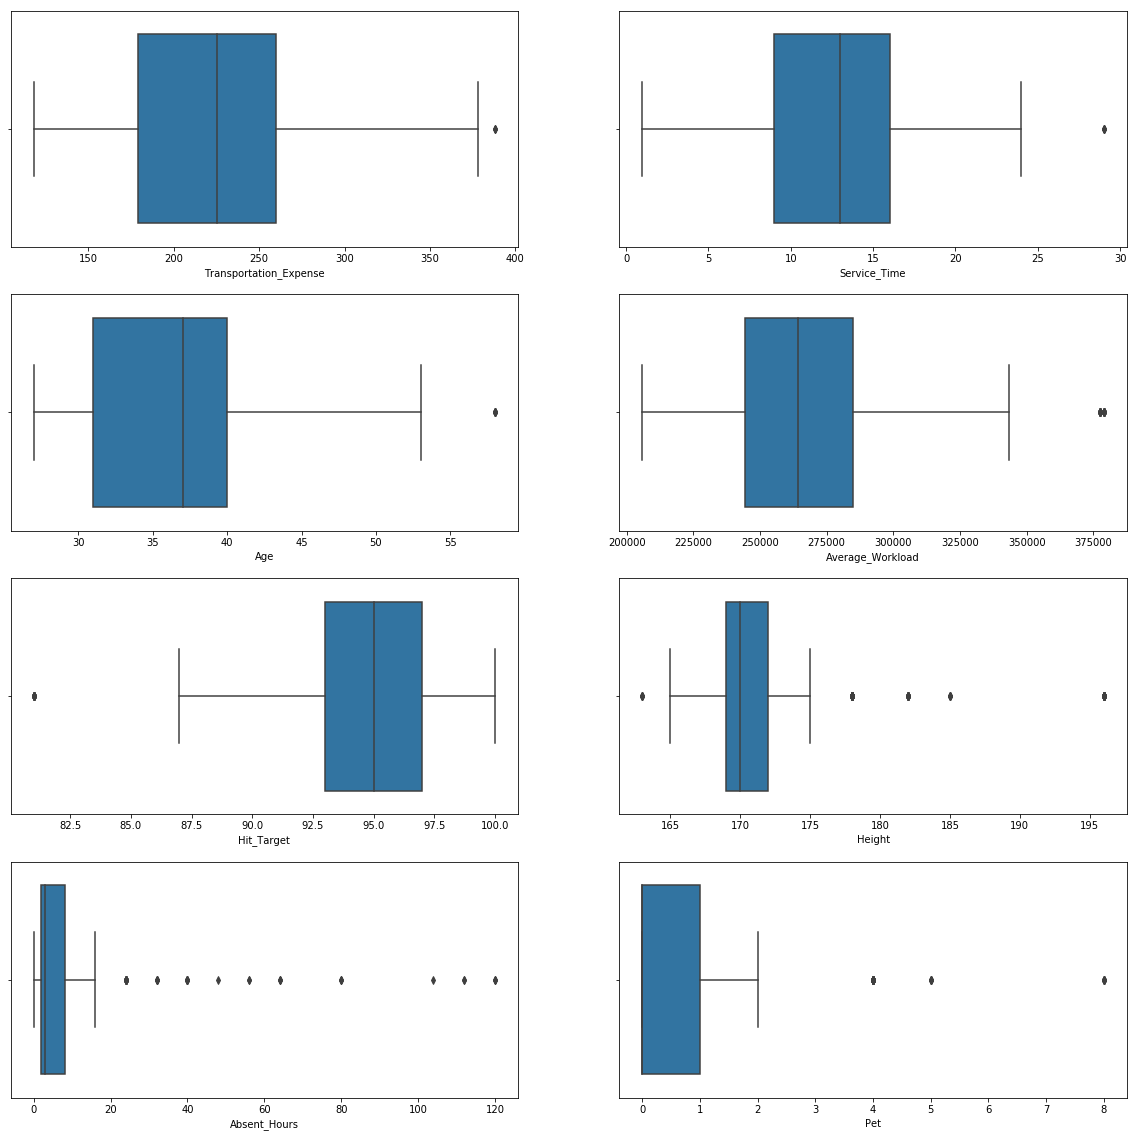

In [19]:
box = ['Transportation_Expense', 'Service_Time', 'Age',
       'Average_Workload', 'Hit_Target', 'Height',
       'Absent_Hours',  'Pet']
row = 4
col = 2
r = 0
c=0
i=0
fig,ax = plt.subplots(nrows=row,ncols=col)
fig.set_size_inches(20,20)

while r < row:
    c =0
    while c < col:
        sn.boxplot(x=box[i], y=None, hue=None, data=emp_abntsm_new, order=None, hue_order=None, orient=None, color=None, palette=None,ax=ax[r,c])
        c=c+1
        i=i+1
    r=r+1

In [20]:
for i in ['Transportation_Expense', 'Service_Time', 'Age',
       'Average_Workload', 'Hit_Target', 'Height',
       'Absent_Hours']:
    q75,q25 = np.percentile(emp_abntsm_new.loc[:,i],[75,25])
    iqr = q75-q25
    min = q25-1.5*iqr
    max = q75+1.5*iqr
    emp_abntsm_new.loc[emp_abntsm_new[i] < min,i] = min
    emp_abntsm_new.loc[emp_abntsm_new[i] > max,i] = max

In [21]:
print(emp_abntsm_new.shape)


(718, 21)


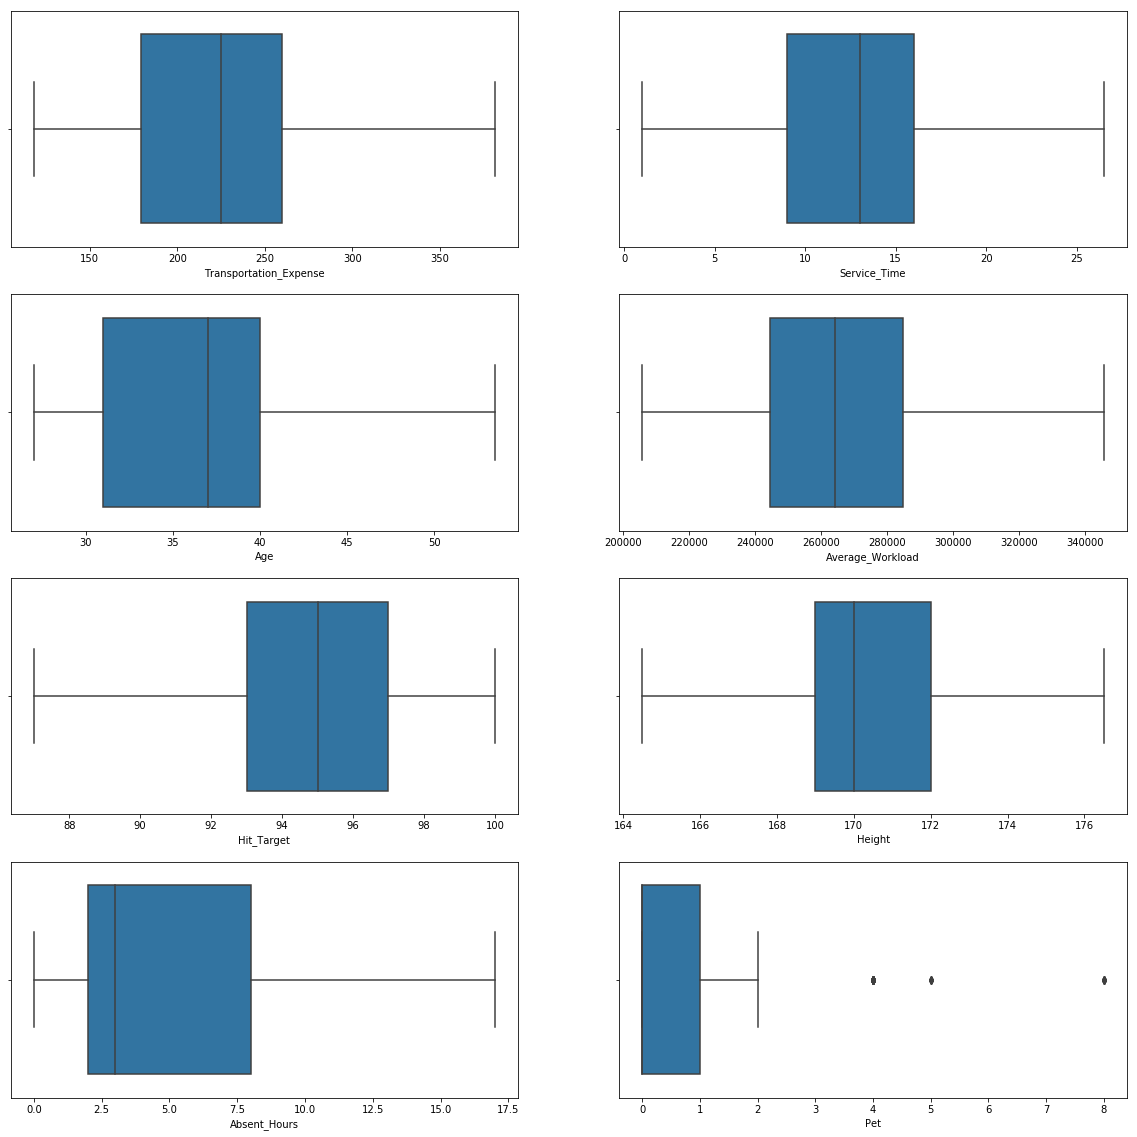

In [22]:
box = ['Transportation_Expense', 'Service_Time', 'Age',
       'Average_Workload', 'Hit_Target', 'Height',
       'Absent_Hours',  'Pet']
row = 4
col = 2
r = 0
c=0
i=0
fig,ax = plt.subplots(nrows=row,ncols=col)
fig.set_size_inches(20,20)

while r < row:
    c =0
    while c < col:
        sn.boxplot(x=box[i], y=None, hue=None, data=emp_abntsm_new, order=None, hue_order=None, orient=None, color=None, palette=None,ax=ax[r,c])
        c=c+1
        i=i+1
    r=r+1

In [23]:
emp_abntsm.dtypes

ID                          int64
Absence_Reason            float64
Absence_Month             float64
Absence_Day                 int64
Seasons                     int64
Transportation_Expense    float64
Work_Distance             float64
Service_Time              float64
Age                       float64
Average_Workload          float64
Hit_Target                float64
Disciplinary_Failure      float64
Education                 float64
Son                       float64
Drinker                   float64
Smoker                    float64
Pet                       float64
Weight                    float64
Height                    float64
BMI                       float64
Absent_Hours              float64
dtype: object

In [24]:
#### 3d.) ------- Converting -- Converting data to proper formats
# features like 'Absence_Month','Education' are categories here. Lets convert to categories
categorical_var = ['Absence_Reason','Absence_Month','Absence_Day','Seasons','Disciplinary_Failure','Education','Son','Drinker','Smoker','Pet']
continous_var = ['Transportation_Expense','Work_Distance','Service_Time','Age','Average_Workload','Hit_Target','Weight','Height','BMI']
target_var = ['Absent_Hours']

for i in categorical_var:
    emp_abntsm_new[i] = emp_abntsm_new[i].astype("category")
emp_abntsm_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 739
Data columns (total 21 columns):
ID                        718 non-null int64
Absence_Reason            718 non-null category
Absence_Month             718 non-null category
Absence_Day               718 non-null category
Seasons                   718 non-null category
Transportation_Expense    718 non-null float64
Work_Distance             718 non-null float64
Service_Time              718 non-null float64
Age                       718 non-null float64
Average_Workload          718 non-null float64
Hit_Target                718 non-null float64
Disciplinary_Failure      718 non-null category
Education                 718 non-null category
Son                       718 non-null category
Drinker                   718 non-null category
Smoker                    718 non-null category
Pet                       718 non-null category
Weight                    718 non-null float64
Height                    718 non-null fl

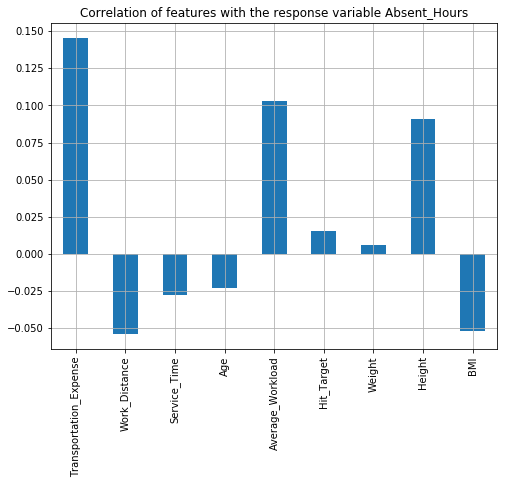

In [25]:
#------------- Explore continous features -----------------
##Explore the correlation btwn the independent continous features with target variabe
corr=emp_abntsm_new[continous_var].corrwith(emp_abntsm_new.Absent_Hours)
corr.plot.bar(figsize=(8,6), title='Correlation of features with the response variable Absent_Hours', grid=True, legend=False, style=None, fontsize=None, colormap=None, label=None)

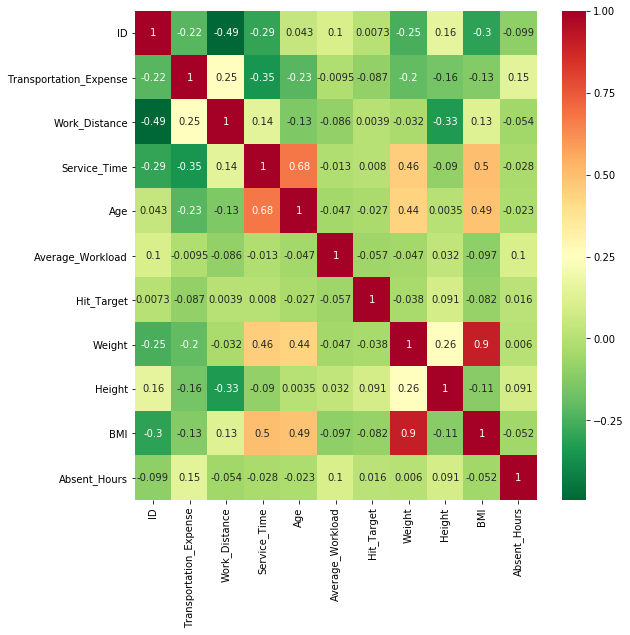

In [26]:
plt.figure(figsize=(9,9)) 
sn.heatmap(emp_abntsm_new.corr(),annot=True,cmap='RdYlGn_r') 
plt.show()

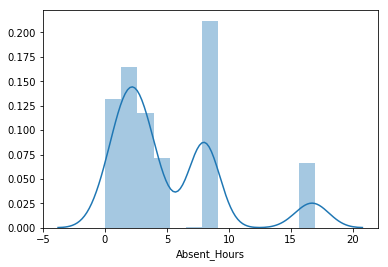

In [27]:
# Checking the distribution of target feature
sn.distplot(emp_abntsm_new['Absent_Hours'], bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)

In [28]:
#---- Drop the features which are not very relevant based on above analyses
emp_df  = emp_abntsm_new[['ID','Absence_Month','Son','Drinker','Work_Distance','Service_Time','Age','Average_Workload','Absent_Hours']]

#---- Now, since we need to predict the losses per month, Lets aggregate the data on month(and ID, since the features category is different for each ID) before feeding the data to model.

In [29]:
#----Lets aggregate the data on 'Month' and 'Id'
emp_num = emp_df[['ID','Absence_Month','Work_Distance','Service_Time','Age','Average_Workload']].groupby(['ID','Absence_Month']).max().reset_index()
emp_tgt = emp_df[['ID','Absence_Month','Absent_Hours']].groupby(['ID','Absence_Month']).sum().reset_index()
emp_cat = emp_abntsm[['ID','Absence_Month','Son','Drinker']].groupby(['ID','Absence_Month']).max().reset_index()
emp = emp_num.merge(emp_cat, how='inner',left_on=['ID','Absence_Month'], right_on=['ID','Absence_Month']).merge(emp_tgt, how='inner',left_on=['ID','Absence_Month'], right_on=['ID','Absence_Month'])
emp.head()

,ID,Absence_Month,Work_Distance,Service_Time,Age,Average_Workload,Son,Drinker,Absent_Hours
0,1,1,11.0,14.0,37.0,330061.0,1.0,0.0,1.0
1,1,3,11.0,14.0,37.0,244387.0,1.0,0.0,16.0
2,1,4,11.0,14.0,37.0,326452.0,1.0,0.0,11.0
3,1,5,11.0,14.0,37.0,246074.0,1.0,0.0,16.0
4,1,6,11.0,14.0,37.0,345552.0,1.0,0.0,24.0


In [30]:
#--- Lets deal with Nans introduced(same way already done above, by imputing)

#---- imputing Nan values with max each value present for a particular id. eg. Age will always be same for any id.
final_col = ['Work_Distance','Service_Time','Age','Drinker','Son']
#----impute missing values and Nas --------
for i in emp['ID'].unique(): 
    for j in final_col :
        emp.loc[((emp['ID'] == i) & (emp[j].isna())), j] = emp[(emp.ID==i)][j].max()
        
# update workload with the mode of corresponding month's workload
for i in emp['Absence_Month'].unique(): 
    frequent_wrkld = stats.mode(emp[emp['Absence_Month']==i]['Average_Workload'])[0][0]
    emp.loc[((emp['Absence_Month']==i) & pd.isna(emp['Average_Workload'])),'Average_Workload'] = frequent_wrkld

#update NA 'Absent_Hours' with 0
emp.Absent_Hours = emp.Absent_Hours.fillna(0)

In [31]:
emp.head()

,ID,Absence_Month,Work_Distance,Service_Time,Age,Average_Workload,Son,Drinker,Absent_Hours
0,1,1,11.0,14.0,37.0,330061.0,1.0,0.0,1.0
1,1,3,11.0,14.0,37.0,244387.0,1.0,0.0,16.0
2,1,4,11.0,14.0,37.0,326452.0,1.0,0.0,11.0
3,1,5,11.0,14.0,37.0,246074.0,1.0,0.0,16.0
4,1,6,11.0,14.0,37.0,345552.0,1.0,0.0,24.0


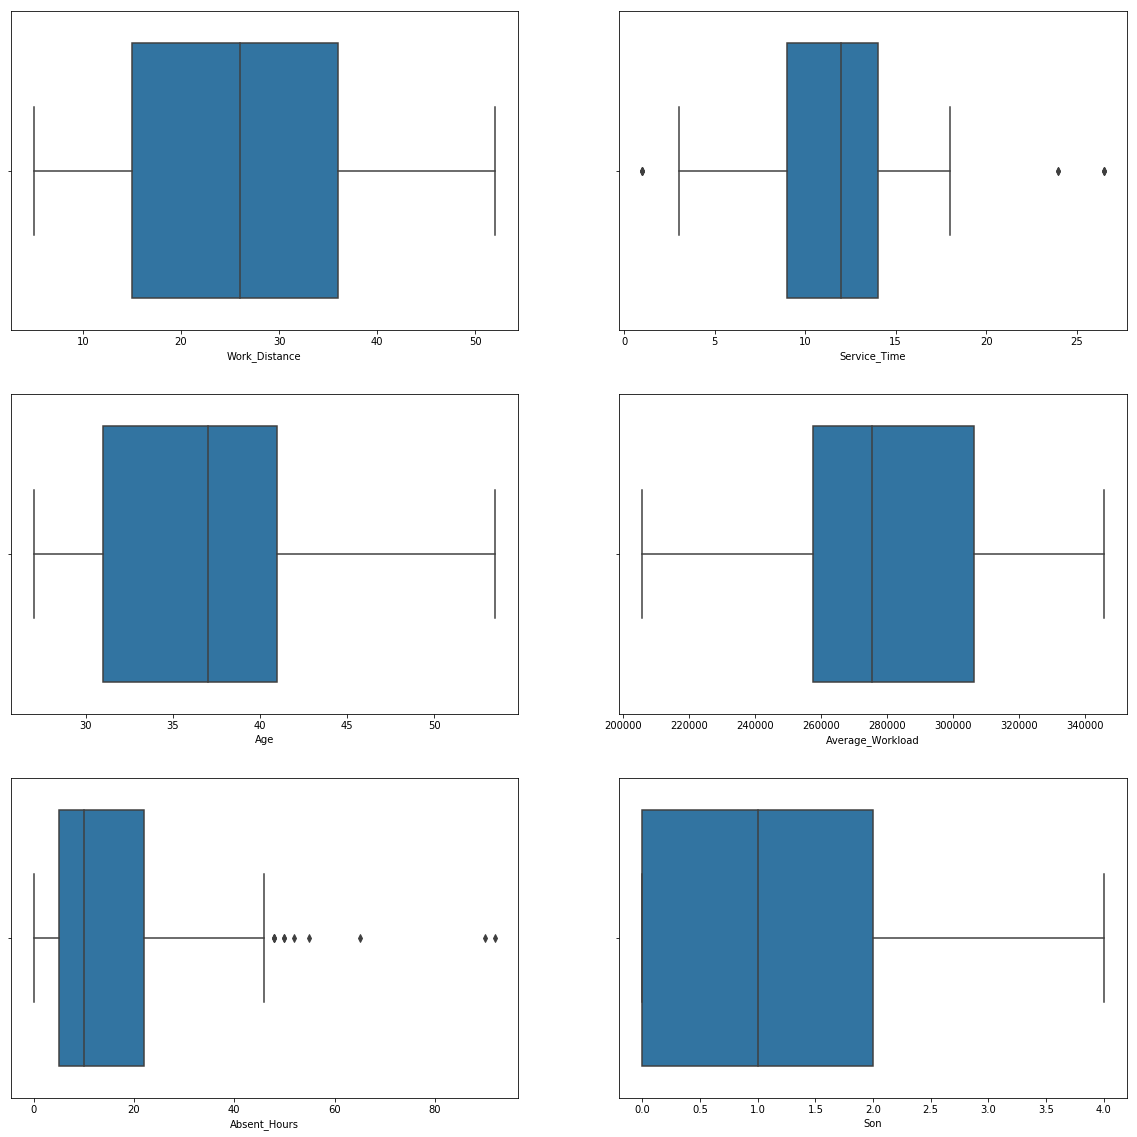

In [32]:
#----- Lets check for any outliers in the aggregated data -----
continous_var = ['Work_Distance','Service_Time','Age','Average_Workload','Absent_Hours','Son']
row = 3
col = 2
r = 0
c=0
i=0
fig,ax = plt.subplots(nrows=row,ncols=col)
fig.set_size_inches(20,20)

while r < row:
    c =0
    while c < col:
        sn.boxplot(x=continous_var[i], y=None, hue=None, data=emp, order=None, orient=None, ax=ax[r,c])
        c=c+1
        i=i+1
    r=r+1

In [33]:
# Clearly, 'Absent_Hours' has so many outliers, this will affect model. So, extreme outliers needs to be removed to make the model more generic.
# We are not removing outliers in service time, since the input data for 2011 is going to be same as 2010(except 'Age' and 'ServiceTime')

In [34]:
#----- Create a function to remove outliers from any column, from any database
def remove_outlier(df_in, col_name):
    q1 = np.percentile(df_in[col_name],25)
    q3 = np.percentile(df_in[col_name],75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [35]:
#--- remove out liers
continous_var = ['Service_Time','Age','Absent_Hours']
for i in continous_var:
    emp = remove_outlier(emp,i)

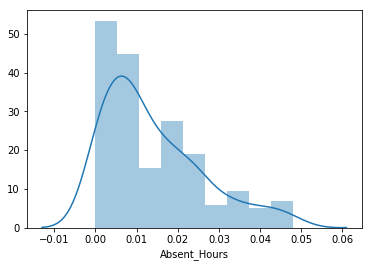

In [36]:
# Check the distribution of target feature.
#It seems better distributed then previous
sn.distplot(emp['Absent_Hours']/1000, bins=None, hist=True, kde=True)

In [37]:
emp.shape

(218, 9)

In [38]:
def Standardize_Values(df):
    df_new = df
    var = ['Work_Distance','Service_Time','Age','Average_Workload']
    for i in var:
        df_new[i] = (np.max(df_new[i]) - df_new[i]) / (np.max(df_new[i]) - np.min(df_new[i]))
    return df_new

In [39]:
#--- Standardize the values ---
emp_final = Standardize_Values(emp)
emp_final.head()

,ID,Absence_Month,Work_Distance,Service_Time,Age,Average_Workload,Son,Drinker,Absent_Hours
0,1,1,0.87234,0.266667,0.615385,0.110939,1.0,0.0,1.0
1,1,3,0.87234,0.266667,0.615385,0.724496,1.0,0.0,16.0
2,1,4,0.87234,0.266667,0.615385,0.136785,1.0,0.0,11.0
3,1,5,0.87234,0.266667,0.615385,0.712415,1.0,0.0,16.0
4,1,6,0.87234,0.266667,0.615385,0.000000,1.0,0.0,24.0


In [40]:
#--- define a function which takes model, predicted and test values and returns evalution matrix: R-squared value,RootMeanSquared,MeanAbsoluteError
def model_eval_matrix(model,X_test,Y_test,Y_predict):
    r_squared = model.score(X_test, Y_test)
    mse = mean_squared_error(Y_predict, Y_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_predict, Y_test)
    return r_squared,mse,rmse, mae

In [41]:
#train,test = train_test_split(emp_final, test_size=0.20, random_state=1)
train = emp_final[:80]
test = emp_final[20:]
X_train = train.drop(columns = ['Absent_Hours','ID'])
#Y_train = np.log(train.Absent_Hours)
Y_train = train.Absent_Hours/1000
X_test = test.drop(columns = ['Absent_Hours','ID'])
#Y_test = np.log(test.Absent_Hours)
Y_test = test.Absent_Hours/1000

In [42]:
#--Define Linear regession model --
lrm_regressor = LinearRegression()
lrm_regressor.fit(X_train, Y_train)
Y_predict_lrm =lrm_regressor.predict(X_test)

In [43]:
#------- Random Forest Model (Ensemble method using Bagging technique) --------------
forest_reg = RandomForestRegressor(n_estimators=2000, criterion='mse', max_depth=10, min_samples_split=5, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=20, min_impurity_decrease=0.00, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=1, verbose=0, warm_start=False)
forest_reg.fit(X_train, Y_train)
Y_predict_forest =forest_reg.predict(X_test)

In [44]:
## ----------- Building XGBoost Model (Ensemble method using Boosting technique) ---------------
#xgb_reg = GradientBoostingRegressor(random_state=1) # without parameter hypertuning
# Following model is with parameter hypertuning
xgb_reg = GradientBoostingRegressor(loss='ls', learning_rate=0.2, n_estimators=2000, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=1, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=15, warm_start=False, presort='auto')
xgb_reg.fit(X_train, Y_train)
Y_predict_xgb = xgb_reg.predict(X_test)

In [45]:
#---Stroring all model performances in dataframe to compare----
metric=[]
ml_models=['Linear Reg','Random Forest','GradientBoost']
fitted_models= [lrm_regressor,forest_reg,xgb_reg]
Y_Predict =[Y_predict_lrm,Y_predict_forest,Y_predict_xgb]
i=0
for mod in ml_models:
    R_SQR,MSE,RMSE,MAE = model_eval_matrix(fitted_models[i],X_test,Y_test,Y_Predict[i])
    metric.append([mod,R_SQR,MSE,RMSE,MAE])
    i=i+1
df_mod_performance=pd.DataFrame(metric,columns =['Model','R-Squared','MeanSquaredError','RootMeanSquaredError','MeanAbsoluteError'])
df_mod_performance[['Model','RootMeanSquaredError']]

,Model,RootMeanSquaredError
0,Linear Reg,0.011517
1,Random Forest,0.011313
2,GradientBoost,0.012770
